Hasil Interpolasi Linear: 14.0
Hasil Interpolasi Quadratic: 14.375
Hasil Interpolasi Cubic: 14.1875
Relatif Error (Linear vs Cubic): 1.32%
Relatif Error (Quadratic vs Cubic): 1.32%


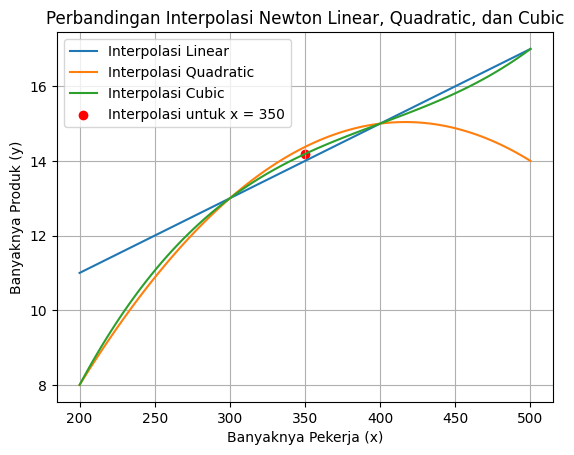

In [1]:
#Interpolasi newton
import numpy as np
import matplotlib.pyplot as plt


def newton_interpolation(x, y, n, x_interpolate, order):
    f = [[0 for i in range(n)] for j in range(n)]
    for i in range(n):
        f[i][0] = y[i]

    for i in range(1, n):
        for j in range(n - i):
            f[j][i] = (f[j + 1][i - 1] - f[j][i - 1]) / (x[i + j] - x[j])

    result = f[0][0]
    for i in range(1, n):
        term = f[0][i]
        for j in range(i):
            term *= (x_interpolate - x[j])
        result += term

    return result


# Masukkan nilai X dan Y
X = [200, 300, 400, 500]
Y = [8, 13, 15, 17]

# Masukkan nilai 𝑥 yang ingin Anda interpolasi
x_interpolate = 350

# Ambil data yang diperlukan untuk interpolasi linear
X_linear = [300, 400]
Y_linear = [13, 15]

# Ambil data yang diperlukan untuk interpolasi quadratic
X_quadratic = [200, 300, 400]
Y_quadratic = [8, 13, 15]

# Ambil data yang diperlukan untuk interpolasi cubic
X_cubic = [200, 300, 400, 500]
Y_cubic = [8, 13, 15, 17]

# Orde interpolasi
order_linear = 2
order_quadratic = 3
order_cubic = 4

# Hitung interpolasi
result_linear = newton_interpolation(
    X_linear, Y_linear, len(X_linear), x_interpolate, order_linear)
result_quadratic = newton_interpolation(
    X_quadratic, Y_quadratic, len(X_quadratic), x_interpolate, order_quadratic)
result_cubic = newton_interpolation(
    X_cubic, Y_cubic, len(X_cubic), x_interpolate, order_cubic)

# Hitung relatif error
relative_error_linear = abs(
    (result_linear - result_cubic) / result_cubic) * 100
relative_error_quadratic = abs(
    (result_quadratic - result_cubic) / result_cubic) * 100

# Tampilkan hasil
print("Hasil Interpolasi Linear:", result_linear)
print("Hasil Interpolasi Quadratic:", result_quadratic)
print("Hasil Interpolasi Cubic:", result_cubic)
print("Relatif Error (Linear vs Cubic): {:.2f}%".format(relative_error_linear))
print("Relatif Error (Quadratic vs Cubic): {:.2f}%".format(
    relative_error_quadratic))

# Membuat plot untuk visualisasi interpolasi
x_plot = np.linspace(min(X), max(X), 100)
y_plot_linear = [newton_interpolation(X_linear, Y_linear, len(
    X_linear), xi, order_linear) for xi in x_plot]
y_plot_quadratic = [newton_interpolation(X_quadratic, Y_quadratic, len(
    X_quadratic), xi, order_quadratic) for xi in x_plot]
y_plot_cubic = [newton_interpolation(X_cubic, Y_cubic, len(
    X_cubic), xi, order_cubic) for xi in x_plot]

plt.plot(x_plot, y_plot_linear, label='Interpolasi Linear')
plt.plot(x_plot, y_plot_quadratic, label='Interpolasi Quadratic')
plt.plot(x_plot, y_plot_cubic, label='Interpolasi Cubic')

plt.scatter(x_interpolate, result_cubic, color='red',
            label=f'Interpolasi untuk x = {x_interpolate}')
plt.xlabel('Banyaknya Pekerja (x)')
plt.ylabel('Banyaknya Produk (y)')
plt.legend()
plt.title('Perbandingan Interpolasi Newton Linear, Quadratic, dan Cubic')
plt.grid(True)
plt.show()

In [ ]:
#Lagrange Interpolation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def lagrange_interpolation(x, y, n, x_interpolate):
    f = [0] * n

    for i in range(n):
        term = y[i]
        for j in range(n):
            if i != j:
                term *= (x_interpolate - x[j]) / (x[i] - x[j])
        f[i] = term

    result = sum(f)
    return result, f


# Masukkan nilai X dan Y secara manual
X_linear = [300, 400]
Y_linear = [13, 15]

X_quadratic = [200, 300, 400]
Y_quadratic = [8, 13, 15]

X_cubic = [200, 300, 400, 500]
Y_cubic = [8, 13, 15, 17]

# Masukkan nilai 𝑥 yang ingin Anda interpolasi
x_interpolate = 350

# Hitung interpolasi Lagrange untuk orde linear, quadratic, dan cubic
# Linear (mengambil dua titik terdekat)
result_linear, _ = lagrange_interpolation(
    X_linear, Y_linear, len(X_linear), x_interpolate)
# Quadratic (mengambil tiga titik terdekat)
result_quadratic, _ = lagrange_interpolation(
    X_quadratic, Y_quadratic, len(X_quadratic), x_interpolate)
# Cubic (mengambil empat titik terdekat)
result_cubic, _ = lagrange_interpolation(
    X_cubic, Y_cubic, len(X_cubic), x_interpolate)

# Hitung relative error
relative_error_linear = abs(
    (result_linear - result_cubic) / result_cubic) * 100
relative_error_quadratic = abs(
    (result_quadratic - result_cubic) / result_cubic) * 100

# Tampilkan hasil
print("Hasil Interpolasi Linear:", result_linear)
print("Hasil Interpolasi Quadratic:", result_quadratic)
print("Hasil Interpolasi Cubic:", result_cubic)
print("Relative Error (Linear vs Cubic): {:.2f}%".format(
    relative_error_linear))
print("Relative Error (Quadratic vs Cubic): {:.2f}%".format(
    relative_error_quadratic))

# Membuat plot untuk visualisasi interpolasi
x_plot = np.linspace(min(X_cubic), max(X_cubic), 100)
y_plot_linear = [lagrange_interpolation(X_linear, Y_linear, len(X_linear), xi)[
    0] for xi in x_plot]
y_plot_quadratic = [lagrange_interpolation(
    X_quadratic, Y_quadratic, len(X_quadratic), xi)[0] for xi in x_plot]
y_plot_cubic = [lagrange_interpolation(X_cubic, Y_cubic, len(X_cubic), xi)[
    0] for xi in x_plot]

plt.scatter(X_cubic, Y_cubic, label='Data Tabel')
plt.plot(x_plot, y_plot_linear, label='Interpolasi Lagrange Linear')
plt.plot(x_plot, y_plot_quadratic, label='Interpolasi Lagrange Quadratic')
plt.plot(x_plot, y_plot_cubic, label='Interpolasi Lagrange Cubic')
plt.scatter(x_interpolate, result_cubic, color='red',
            label=f'Interpolasi untuk x = {x_interpolate}')
plt.xlabel('Banyaknya Pekerja (x)')
plt.ylabel('Banyaknya Produk (y)')
plt.legend()
plt.title('Perbandingan Interpolasi Lagrange Linear, Quadratic, dan Cubic')
plt.grid(True)
plt.show()

Menggunakan Interpolasi Spline
Banyaknya produk jika banyak pekerja adalah 350: 13.988 ton

Spline 1 ( 200, 300 ):
Spline 1 : y = 8 + 0.000 * (x - 200)^2 + 0.050 * (x - 200) + 0.000 * ((x - 200) / (300 - 200))^2

Spline 2 ( 300, 400 ):
Spline 2 : y = 13 + 0.000 * (x - 300)^2 + 0.019 * (x - 300) + 0.000 * ((x - 300) / (400 - 300))^2

Spline 3 ( 400, 500 ):
Spline 3 : y = 15 + 0.000 * (x - 400)^2 + 0.020 * (x - 400) + 0.000 * ((x - 400) / (500 - 400))^2

Matriks Persamaan Spline:
Spline 1: [ 8, 0.000, 0.050, 0.000 ]
Spline 2: [ 13, 0.000, 0.019, 0.000 ]
Spline 3: [ 15, 0.000, 0.020, 0.000 ]


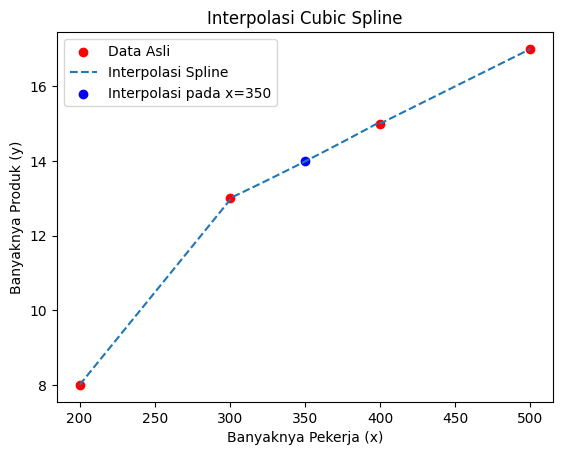

In [2]:
#Spline INTERPOLATION
import numpy as np
import matplotlib.pyplot as plt


def spline_interpolation_equations(x, y):
    n = len(x)
    h = [x[i + 1] - x[i] for i in range(n - 1)]

    alpha = [(3 / h[i]) * (y[i + 1] - y[i]) - (3 / h[i - 1])
             * (y[i] - y[i - 1]) for i in range(1, n - 1)]

    l = [2 * (x[i + 1] - x[i - 1]) - h[i - 1] * ((h[i] + h[i - 1]) / 3)
         for i in range(1, n - 1)]
    mu = [h[i] / l[i - 1] for i in range(1, n - 1)]

    # Inisialisasi variabel z
    z = [0] * (n - 2)

    # Menghitung nilai z
    for i in range(1, n - 1):
        z[i - 1] = (alpha[i - 1] - h[i - 1] * z[i - 2]) / l[i - 1]

    # Inisialisasi list c
    c = [0] * n

    # Menghitung nilai c
    for j in range(n - 2, 0, -1):
        c[j] = z[j - 1] - mu[j - 1] * c[j + 1]

    return c


def spline_interpolation(x, y, x_interpolate):
    n = len(x)
    c = spline_interpolation_equations(x, y)

    i = 0
    while x[i] < x_interpolate:
        i += 1
    i -= 1

    result = y[i] + c[i] * (x_interpolate - x[i]) ** 2 + ((y[i + 1] - y[i]) / (x[i + 1] - x[i]) - (2 * c[i] + c[i + 1]) * (
        x[i + 1] - x[i]) / 3) * (x_interpolate - x[i]) + c[i] * ((x_interpolate - x[i]) / (x[i + 1] - x[i])) ** 2

    return result, i, c


def plot_spline_interpolation(X, Y, x_interpolate, result, i, c):
    plt.scatter(X, Y, color='red', label='Data Asli')

    # Generate titik-titik untuk kurva spline
    x_curve = np.linspace(min(X), max(X), 1000)
    y_curve = [spline_interpolation(X, Y, x)[0] for x in x_curve]

    plt.plot(x_curve, y_curve, label='Interpolasi Spline', linestyle='dashed')

    # Tandai titik interpolasi
    plt.scatter(x_interpolate, result, color='blue',
                label='Interpolasi pada x={}'.format(x_interpolate))

    plt.title('Interpolasi Cubic Spline')
    plt.xlabel('Banyaknya Pekerja (x)')
    plt.ylabel('Banyaknya Produk (y)')
    plt.legend()

    plt.show()


# Masukkan nilai X dan Y
X = [200, 300, 400, 500]
Y = [8, 13, 15, 17]

# Masukkan nilai 𝑥 yang ingin Anda interpolasi
x_interpolate = 350

# Hitung interpolasi spline
result, i, c = spline_interpolation(X, Y, x_interpolate)

# Tampilkan hasil interpolasi dan persamaan setiap spline
print("Menggunakan Interpolasi Spline")
print(
    "Banyaknya produk jika banyak pekerja adalah 350: {:.3f} ton".format(result))

# Tampilkan persamaan setiap spline
for idx in range(len(c) - 1):
    print(f"\nSpline {idx + 1} ( {X[idx]}, {X[idx + 1]} ):")
    print(f"Spline {idx + 1} : y = {Y[idx]} + {c[idx]:.3f} * (x - {X[idx]})^2 + {((Y[idx + 1] - Y[idx]) / (X[idx + 1] - X[idx]) - (2 * c[idx] + c[idx + 1]) * (X[idx + 1] - X[idx]) / 3):.3f} * (x - {X[idx]}) + {c[idx + 1]:.3f} * ((x - {X[idx]}) / ({X[idx + 1]} - {X[idx]}))^2")

# Tampilkan matriks persamaan spline
print("\nMatriks Persamaan Spline:")
for idx in range(len(c) - 1):
    print(f"Spline {idx + 1}: [ {Y[idx]}, {c[idx]:.3f}, {((Y[idx + 1] - Y[idx]) / (X[idx + 1] - X[idx]) - (2 * c[idx] + c[idx + 1]) * (X[idx + 1] - X[idx]) / 3):.3f}, {c[idx + 1]:.3f} ]")

# Visualisasi interpolasi cubic spline
plot_spline_interpolation(X, Y, x_interpolate, result, i, c)